# Almacenamiento y procesamiento masivo de datos - Tarea 3 

**Universidad de los Andes**

**Profesor:** Ignacio Perez<br>
**Alumno:** Cristóbal Griffero C.

### Objetivo

La tarea tres tiene por objetivo profundizar en el uso de notebooks y visualización de datos. Se utilizó el dataset de yelp.

### Preparación

En primer lugar, fue necesario realizar un pre-calculo con [mrjob](https://github.com/Yelp/mrjob) sobre el dataset. El pre-calculo se realizó con el objetivo de obtener un archivo CSV donde se puede encontrar una lista que contiene todos los reviews y la nota para cada categoría. Por ejemplo, el review 4w_BjjcpK8aNx5zbSzyedw se hizo sobre el establecimiento iFEiMJoEqyB9O8OUNSdLzA. A su vez, las categorias de dicho establecimiento son Pubs, Restaurants y Nightlife. El review tiene una calificación de 4 estrellas por lo que esto se transforma en una valoración de 4 estrellas para Pubs, Restaurants y Nightlife. El archivo CSV tiene el siguiente formato:

review_id,category,stars<br>
2aAE1ZVDqMgFDakrl7iRAw,Arts & Entertainment,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Shopping,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Museums,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Art Galleries,5<br>
4OADaU5e2p63-bSPqtyc7w,Arts & Entertainment,3<br>
4OADaU5e2p63-bSPqtyc7w,Shopping,3<br>
4OADaU5e2p63-bSPqtyc7w,Museums,3<br>
...

## Preguntas

### P1

**Visualizar la distribución de las estrellas recibidas por todos los restaurantes en cada categoría.**

En primer lugar, utilizando [pandas](http://pandas.pydata.org), se leyeron los datos desde el CSV generado.

In [1]:
import pandas as pd

data = pd.read_csv('jupyter.csv', sep=',', header=0)

Posteriormente, se obtuvo una lista con todas las categorias que fueron sujetas a algún tipo de review.

In [2]:
categories = []
for review in  data.values:
    if review[1] not in categories:
        categories.append(review[1])
        
print categories

['Arts & Entertainment', 'Shopping', 'Museums', 'Art Galleries', 'Food', 'Restaurants', 'Chinese', 'Department Stores', 'Fashion', 'Pubs', 'Bars', 'Nightlife', 'American (New)', 'Waxing', 'Hair Removal', 'Hair Salons', 'Beauty & Spas', 'Hair Stylists', 'Vegetarian', 'Vegan', 'Kosher', 'Japanese', 'Sushi Bars', 'Dive Bars', 'Automotive', 'Car Dealers', 'Laser Eye Surgery/Lasik', 'Health & Medical', 'Eyewear & Opticians', 'Optometrists', 'Real Estate Agents', 'Home Services', 'Real Estate Services', 'Real Estate', 'Education', 'Elementary Schools', 'Solar Installation', 'Professional Services', 'Marketing', 'Active Life', 'Escape Games', 'Toy Stores', 'Music & DVDs', 'Bookstores', 'Books', 'Mags', 'Music & Video', 'Coffee & Tea', 'Cafes', 'Italian', 'Cosmetics & Beauty Supply', 'Bridal', 'Caterers', 'Event Planning & Services', 'Health Markets', 'Specialty Food', 'Venues & Event Spaces', 'Breweries', 'German', 'Bakeries', 'Desserts', 'Tattoo', 'Skin Care', 'Eyelash Service', 'Permanent M

Con la ayuda de [widgets](http://jupyter.org/widgets.html), se creó un dropdown con el objetivo de poder seleccionar la categoría a visualizar.

In [3]:
import ipywidgets as widgets

In [4]:
selection = widgets.Dropdown(
    options=categories
)

display(selection)

Dropdown(options=('Arts & Entertainment', 'Shopping', 'Museums', 'Art Galleries', 'Food', 'Restaurants', 'Chinese', 'Department Stores', 'Fashion', 'Pubs', 'Bars', 'Nightlife', 'American (New)', 'Waxing', 'Hair Removal', 'Hair Salons', 'Beauty & Spas', 'Hair Stylists', 'Vegetarian', 'Vegan', 'Kosher', 'Japanese', 'Sushi Bars', 'Dive Bars', 'Automotive', 'Car Dealers', 'Laser Eye Surgery/Lasik', 'Health & Medical', 'Eyewear & Opticians', 'Optometrists', 'Real Estate Agents', 'Home Services', 'Real Estate Services', 'Real Estate', 'Education', 'Elementary Schools', 'Solar Installation', 'Professional Services', 'Marketing', 'Active Life', 'Escape Games', 'Toy Stores', 'Music & DVDs', 'Bookstores', 'Books', 'Mags', 'Music & Video', 'Coffee & Tea', 'Cafes', 'Italian', 'Cosmetics & Beauty Supply', 'Bridal', 'Caterers', 'Event Planning & Services', 'Health Markets', 'Specialty Food', 'Venues & Event Spaces', 'Breweries', 'German', 'Bakeries', 'Desserts', 'Tattoo', 'Skin Care', 'Eyelash Service', 'Permanent Makeup', 'Printing Services', 'Arts & Crafts', 'Framing', 'Local Services', 'Glass & Mirrors', 'Tires', 'Auto Repair', 'Makeup Artists', 'Canadian (New)', 'Steakhouses', 'American (Traditional)', 'Shopping Centers', 'Seafood', 'Cajun/Creole', 'Custom Cakes', 'Cupcakes', 'Patisserie/Cake Shop', 'Gluten-Free', 'Korean', 'Barbeque', 'Sandwiches', 'Chicken Wings', 'Pizza', 'Veterinarians', 'Pet Stores', 'Pets', 'Shoe Repair', 'Asian Fusion', 'Noodles', 'Middle Eastern', 'Mediterranean', 'Turkish', 'Kebab', 'Mexican', 'Breakfast & Brunch', 'IT Services & Computer Repair', 'Computers', 'Data Recovery', 'Ice Cream & Frozen Yogurt', 'Salad', 'Baby Gear & Furniture', 'Lounges', 'Wine Bars', 'Gastropubs', 'Grocery', 'Flowers & Gifts', 'Drugstores', 'Dim Sum', 'Laundry Services', 'Dry Cleaning & Laundry', 'Electronics', 'Contractors', 'Home Theatre Installation', 'TV Mounting', 'Shades & Blinds', 'Security Systems', 'Home Automation', 'Convenience Stores', 'Gas Stations', 'Beer', 'Wine & Spirits', 'Hotels & Travel', 'Tours', 'Psychics & Astrologers', 'Amusement Parks', 'Burgers', 'Chocolatiers & Shops', 'Language Schools', 'Specialty Schools', 'Fast Food', 'Session Photography', 'Event Photography', 'Photographers', 'Sports Bars', 'Massage', 'Day Spas', 'Massage Therapy', 'Seafood Markets', 'Ethnic Food', 'Meat Shops', 'Fruits & Veggies', 'Bed & Breakfast', 'Guest Houses', 'Casinos', 'Hotels', 'Nail Salons', 'Gyms', 'Fitness & Instruction', 'Food Stands', 'Golf', 'Sporting Goods', 'Child Care & Day Care', 'Educational Services', 'Preschools', 'Himalayan/Nepalese', 'Indian', 'Resorts', 'Mobile Phones', 'Mobile Phone Repair', 'Hot Dogs', 'Middle Schools & High Schools', 'Cosmetology Schools', 'Tanning', 'Teeth Whitening', 'Chiropractors', 'Juice Bars & Smoothies', 'Barbers', 'Physical Therapy', 'British', 'Wedding Planning', 'Health Retreats', 'Yoga', 'Oil Change Stations', "Men's Clothing", "Women's Clothing", 'Sports Wear', 'Bikes', 'Dance Studios', 'Accessories', 'Hats', 'Ramen', 'Bagels', 'Delis', 'Cocktail Bars', 'Soup', 'French', 'Appliances', 'Home & Garden', 'Hostels', 'Rehabilitation Center', 'Skilled Nursing', 'Party & Event Planning', 'Nail Technicians', 'Party Bus Rentals', 'Transportation', 'Limos', 'Airport Shuttles', 'Taxis', 'Oriental', 'Doctors', 'Cosmetic Dentists', 'Dentists', 'Periodontists', 'General Dentistry', 'Performing Arts', 'Brasseries', 'Latin American', 'Tacos', 'Podiatrists', 'Pet Services', 'Pet Groomers', 'Pet Boarding/Pet Sitting', 'Diners', 'Ear Nose & Throat', 'Peruvian', 'Pool Halls', 'Modern European', 'Reiki', 'Kitchen & Bath', 'Distilleries', 'Used', 'Vintage & Consignment', 'Furniture Stores', 'Home Decor', 'Greek', 'Home Inspectors', 'Apartments', 'Jazz & Blues', 'Soul Food', 'Skating Rinks', 'Tennis', 'Antiques', 'Solar Panel Cleaning', 'Window Washing', 'Gutter Services', 'Pool Cleaners', 'Caribbean', 'Office Equipment', 'Outdoor Furniture Stores', 'Fish & Chips', 'Donuts', 'Tapas Bars', 'Videographe

## Visualización

En primer lugar, se busca en el dataset los reviews de la categoría seleccionada

In [5]:
values = []
for review in  data.values:
    if review[1] == selection.value:
        values.append(review[2])

Para la visualización de la distribución de estrellas por categoría, se utilizó [lightning](http://lightning-viz.org). Con el uso de esta herramienta se creó un histograma capaz de representar la distribución según la categoría seleccionada.


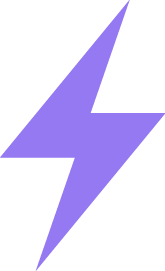

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
#lgn = Lightning(ipython=True, local=True)
lgn.histogram(values, 5, zoom=False)

## Tiempos de ejecución

Los tiempos de ejecución son los siguientes:

*10k: 